#### Procesamiento Digital de Señales

# Trabajo Práctico Nº1
#### Nombre y Apellido: Cristian Torres
***
## Muestreo de señales - Fourier

<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>

***
+ **Senoidal**

> $s(k)=A_0.sin(2\pi.k.\frac{ f_0}{f_s} + \phi_0),\space\space \forall k \in \Bbb{R} \wedge k \in (0, N-1)$

### Código:


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


import math as m


def generador_senoidal (f0,fs,N,a0=1,p0=0):
    signal=[]
    
    for k in range(0,N-1):
        signal.append (a0*m.sin(2*k*m.pi*(f0/fs) + p0))
        
    return signal

# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz

In [ ]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

sg1=generador_senoidal(f0,fs,N,a0,p0)

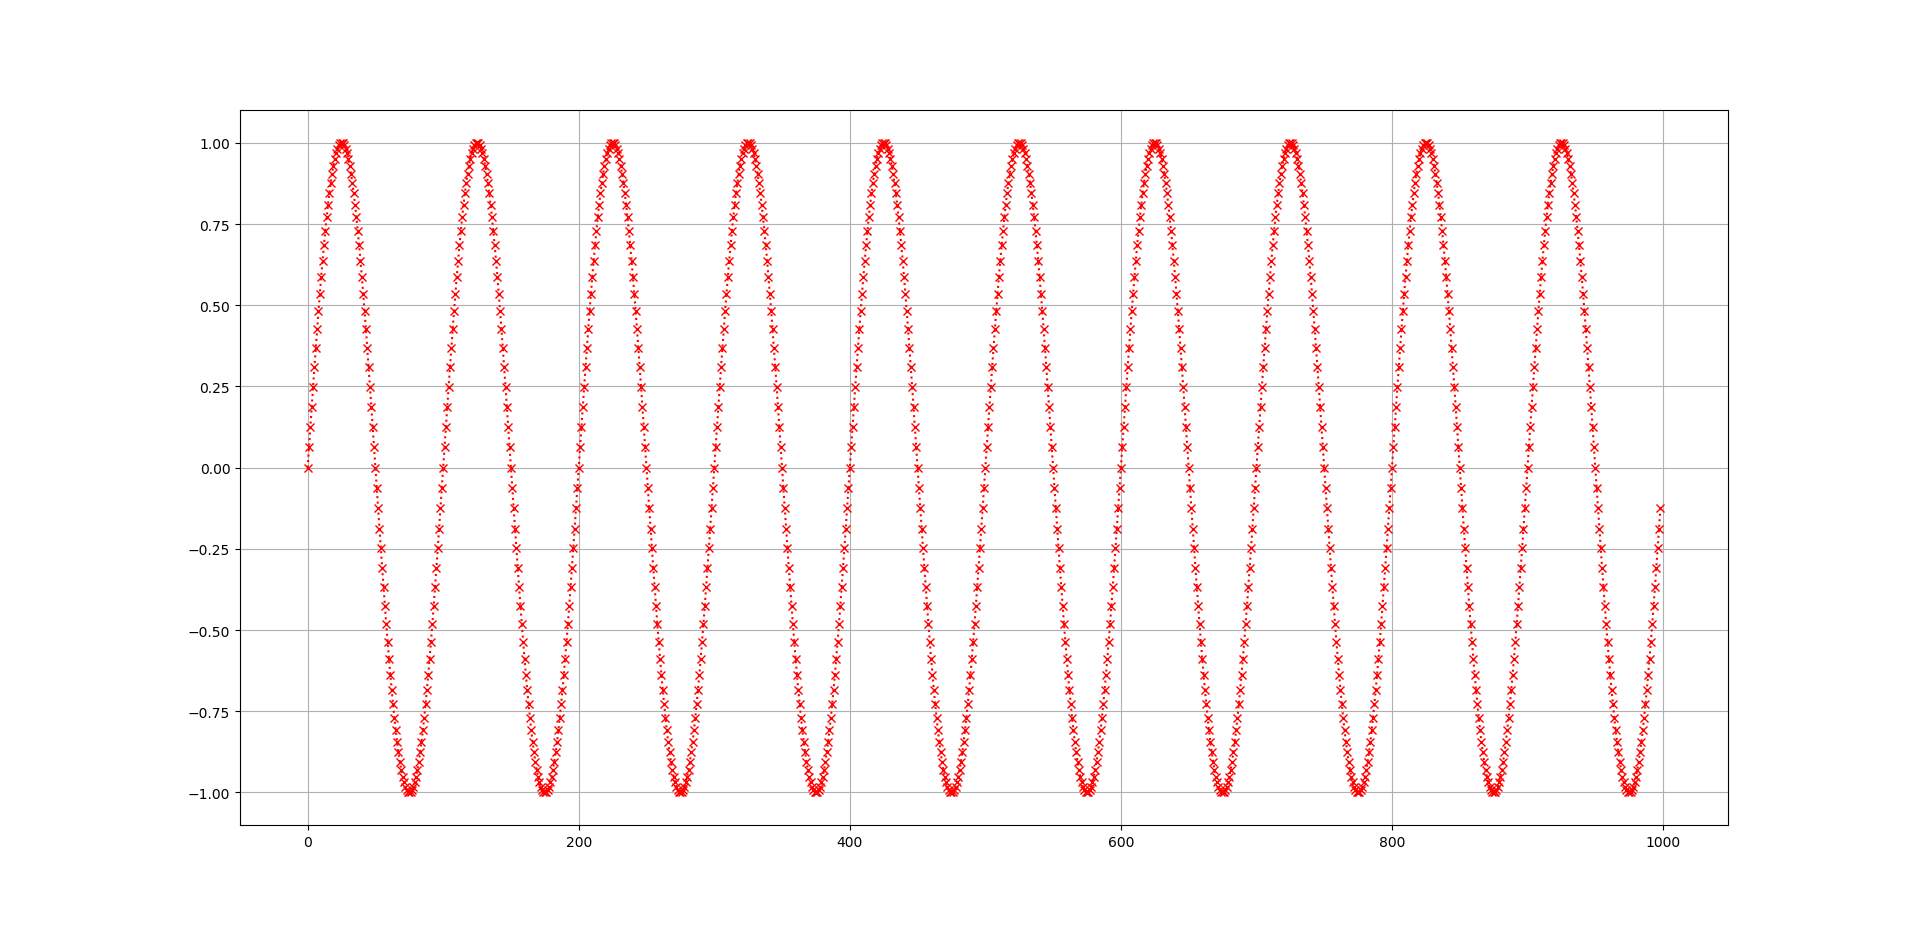

In [ ]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

sg2=generador_senoidal(f0,fs,N,a0,p0)

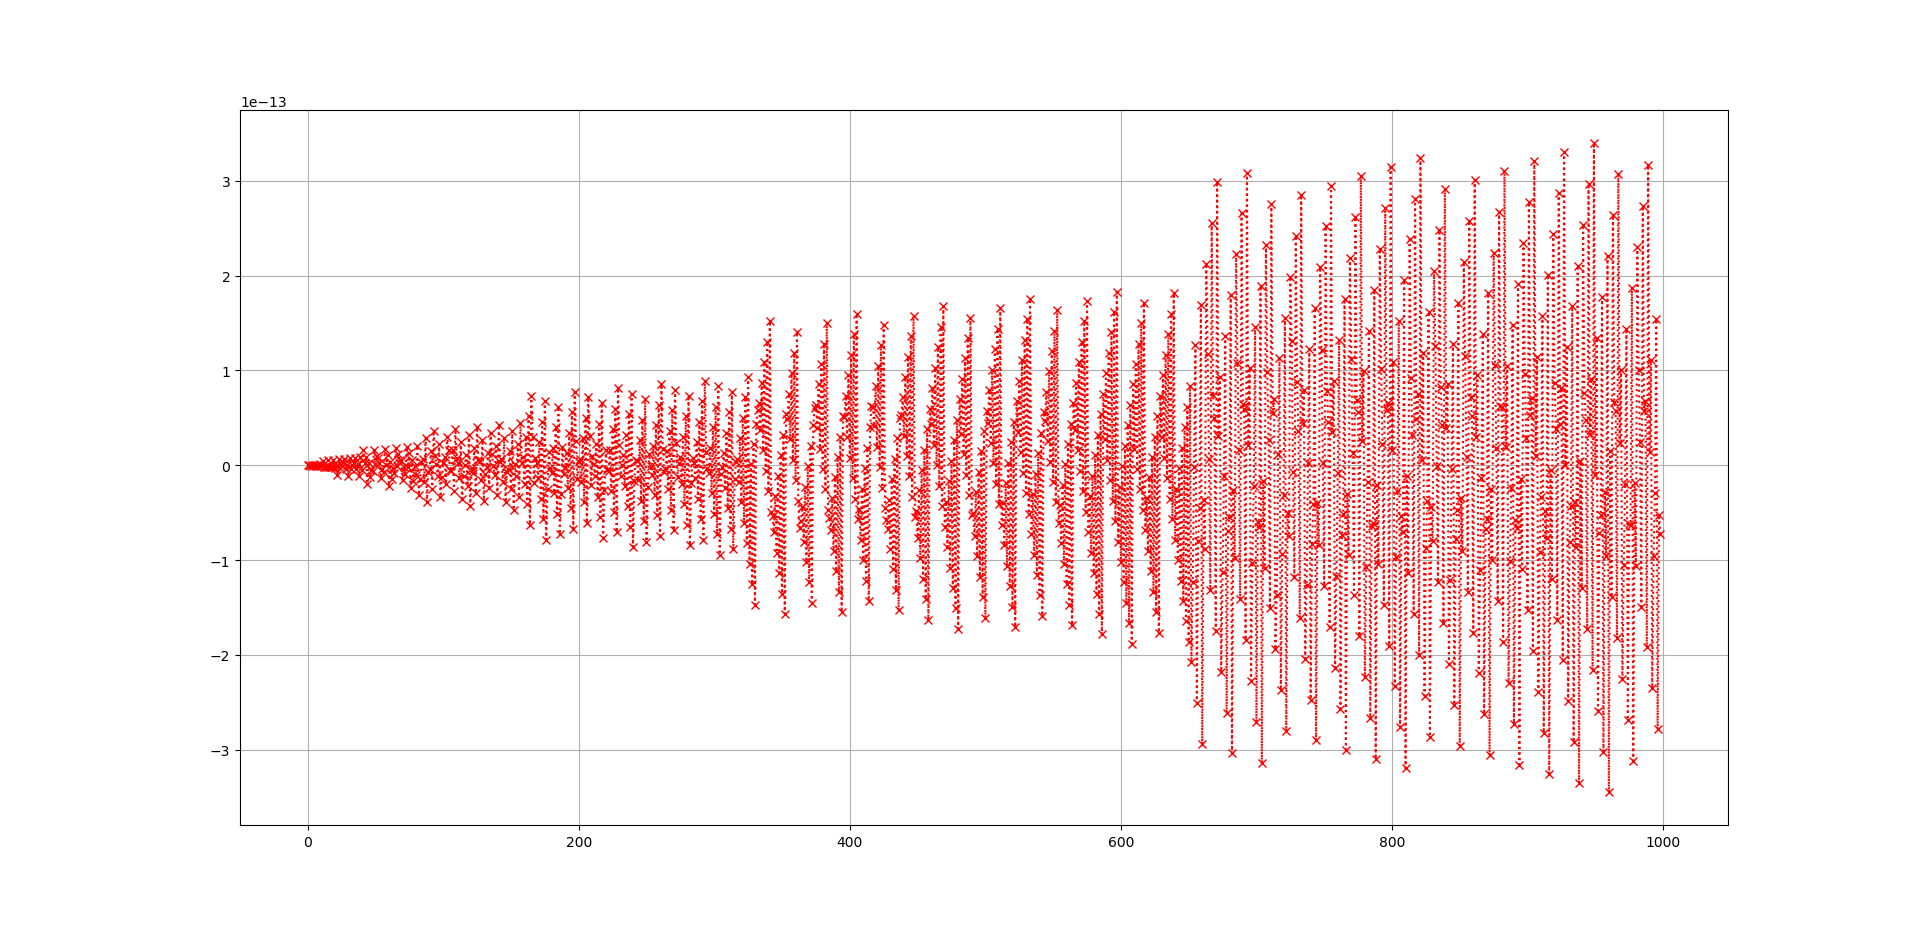

In [ ]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

sg3=generador_senoidal(f0,fs,N,a0,p0)

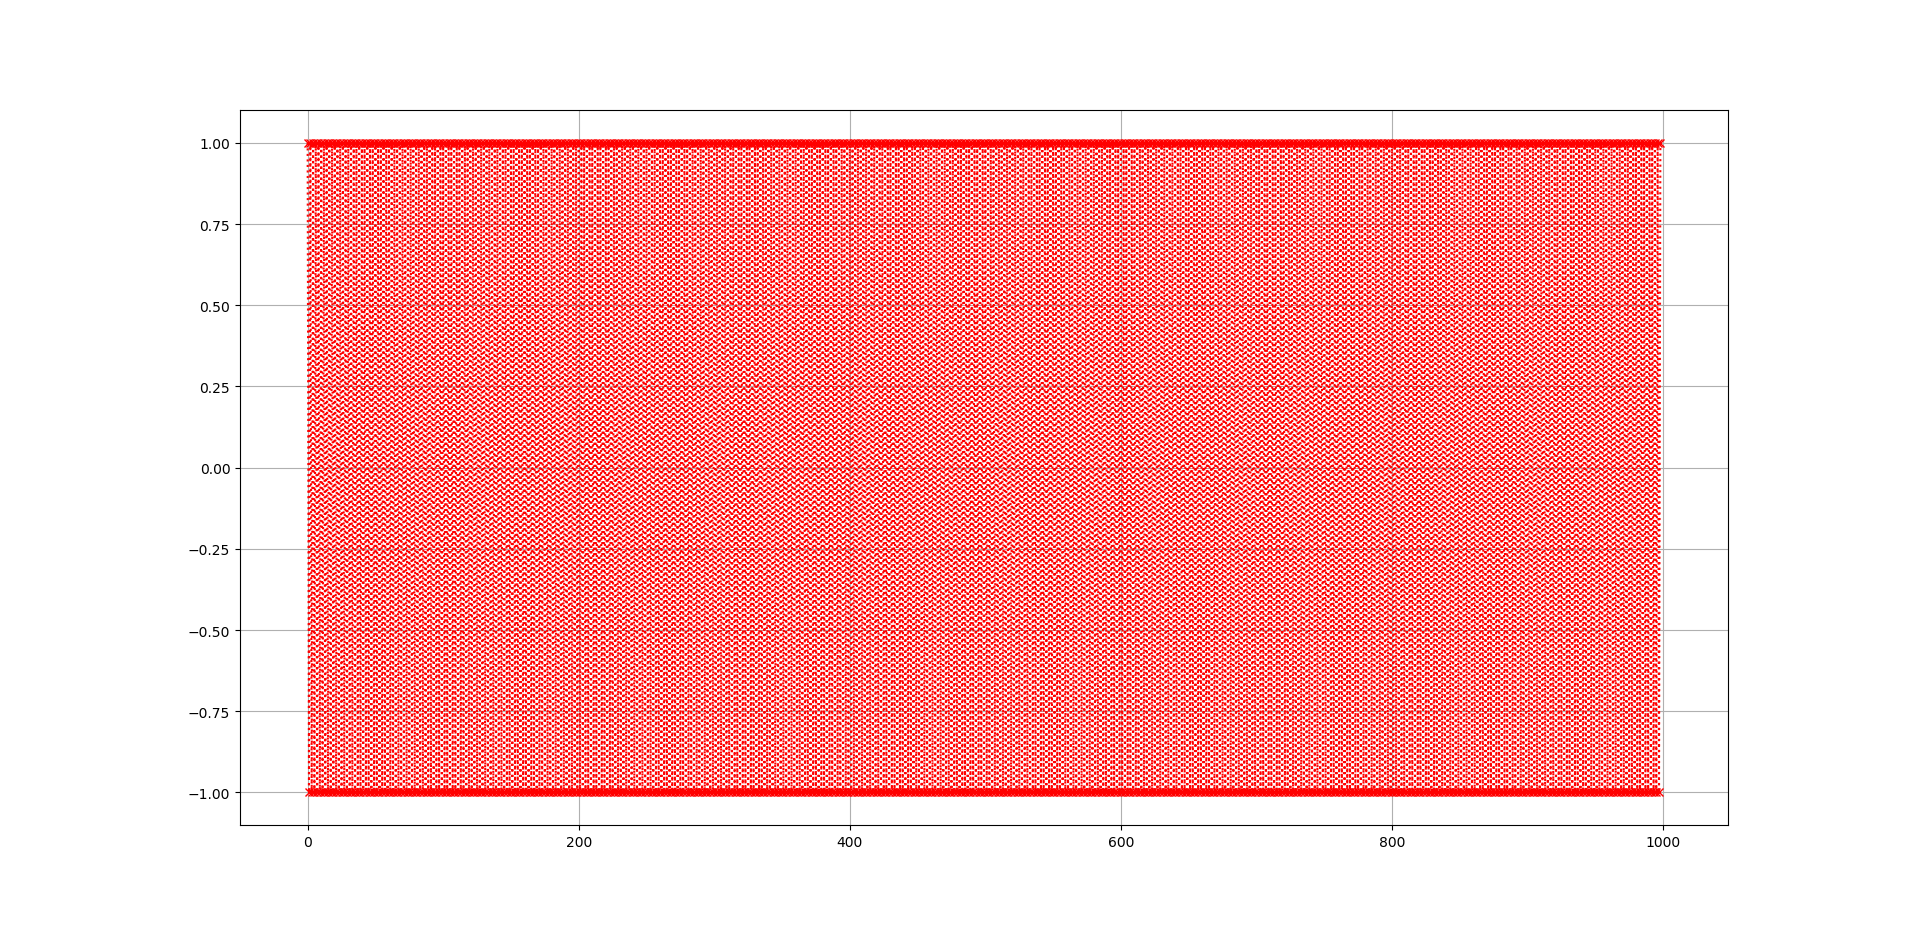

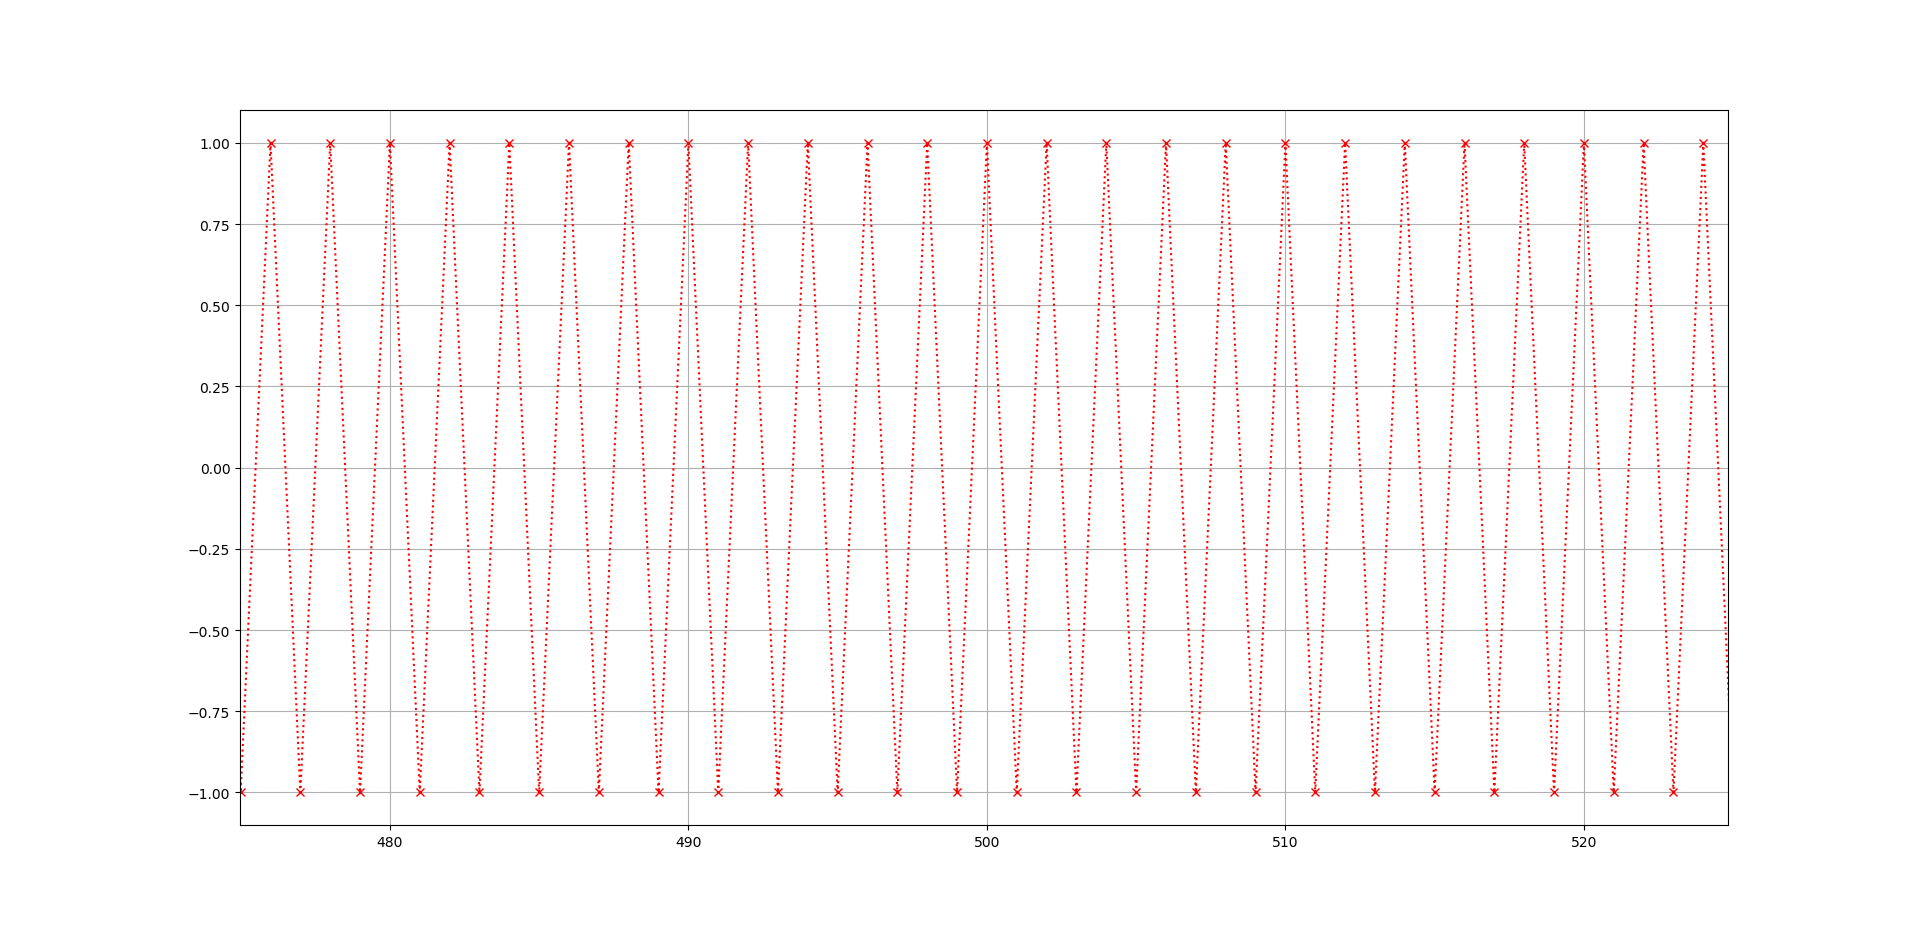

### *Sobre los puntos a.2 y a.3*

En los puntos **a.2** y **a.3** sucede que que la **f0=fs/2**, esto quiere decir que estramos en Nyquist. En estos puntos no podemos conocer los parámetros, debido a que las réplicas debidas al muestreo contaminan la banda de espectro de nuestro interés, la senoidal. El criterio de Nyquist sugiere que **Fs>2*F_max**, que es lo que pasa en el punto **a.4** en el cual la muestra aparece totalmente interpetrable.

In [ ]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs/2 + 10 # Hz

sg4=generador_senoidal(f0,fs,N,a0,p0)

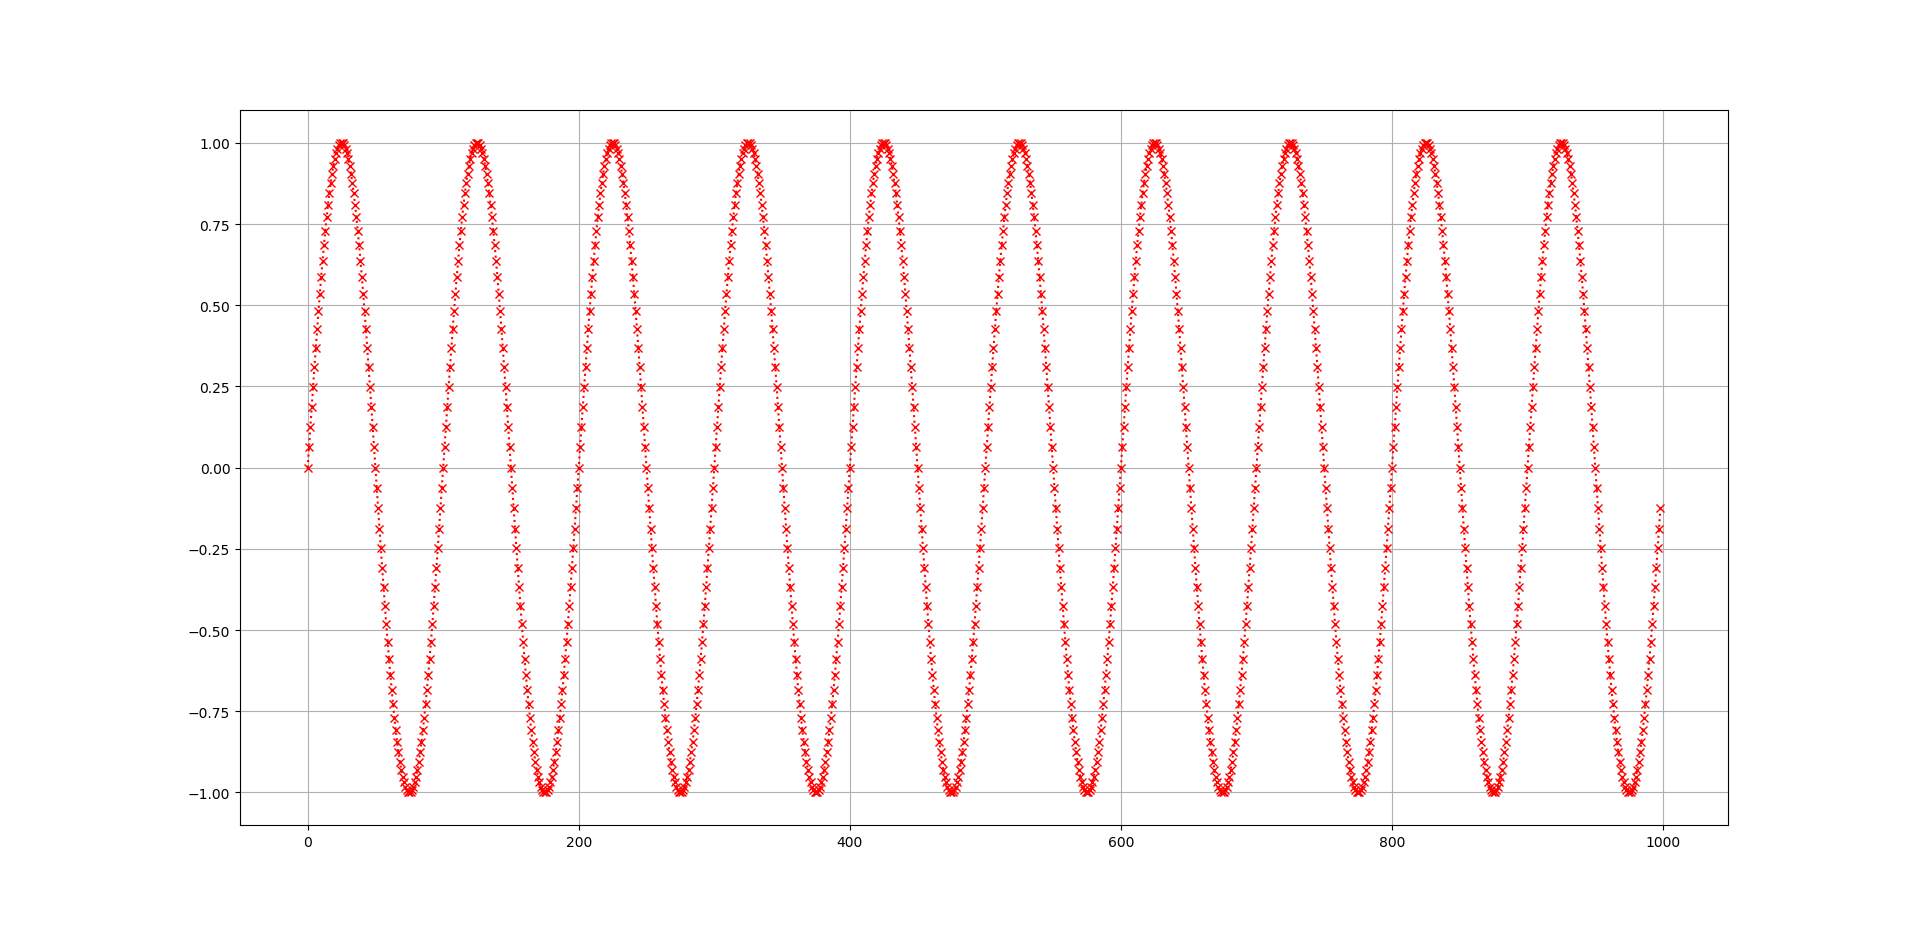

En los puntos **a.1** y **a.4** no es posible diferenciar las gráficas debido a que ocurre una ambigüedad en el dominio de la frecuencia. Esto sigue la siguiente ley:

\begin{equation}
s(n)=A_0.sin(2\pi.f_0.n.t_s)=A_0.sin(2\pi.(f_0+k.f_s).n.t_s)
\end{equation}

Esto indica que una secuencia de valores muestrados digitalmente *s(n)*,representando una onda sinusoidal de $f_0$ Hz, también representa exactamente otras ondas sinusoidales en otras $f_0 + k.f_s$ frecuencias, donde k es entero.

Una forma de diferenciarlas puede ser cambiando las fases.

In [5]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

sg1=generador_senoidal(f0,fs,N,a0,p0)

##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = np.pi/2     # radianes
f0 = fs + 10 # Hz

sg4=generador_senoidal(f0,fs,N,a0,p0)

Senoidal 1
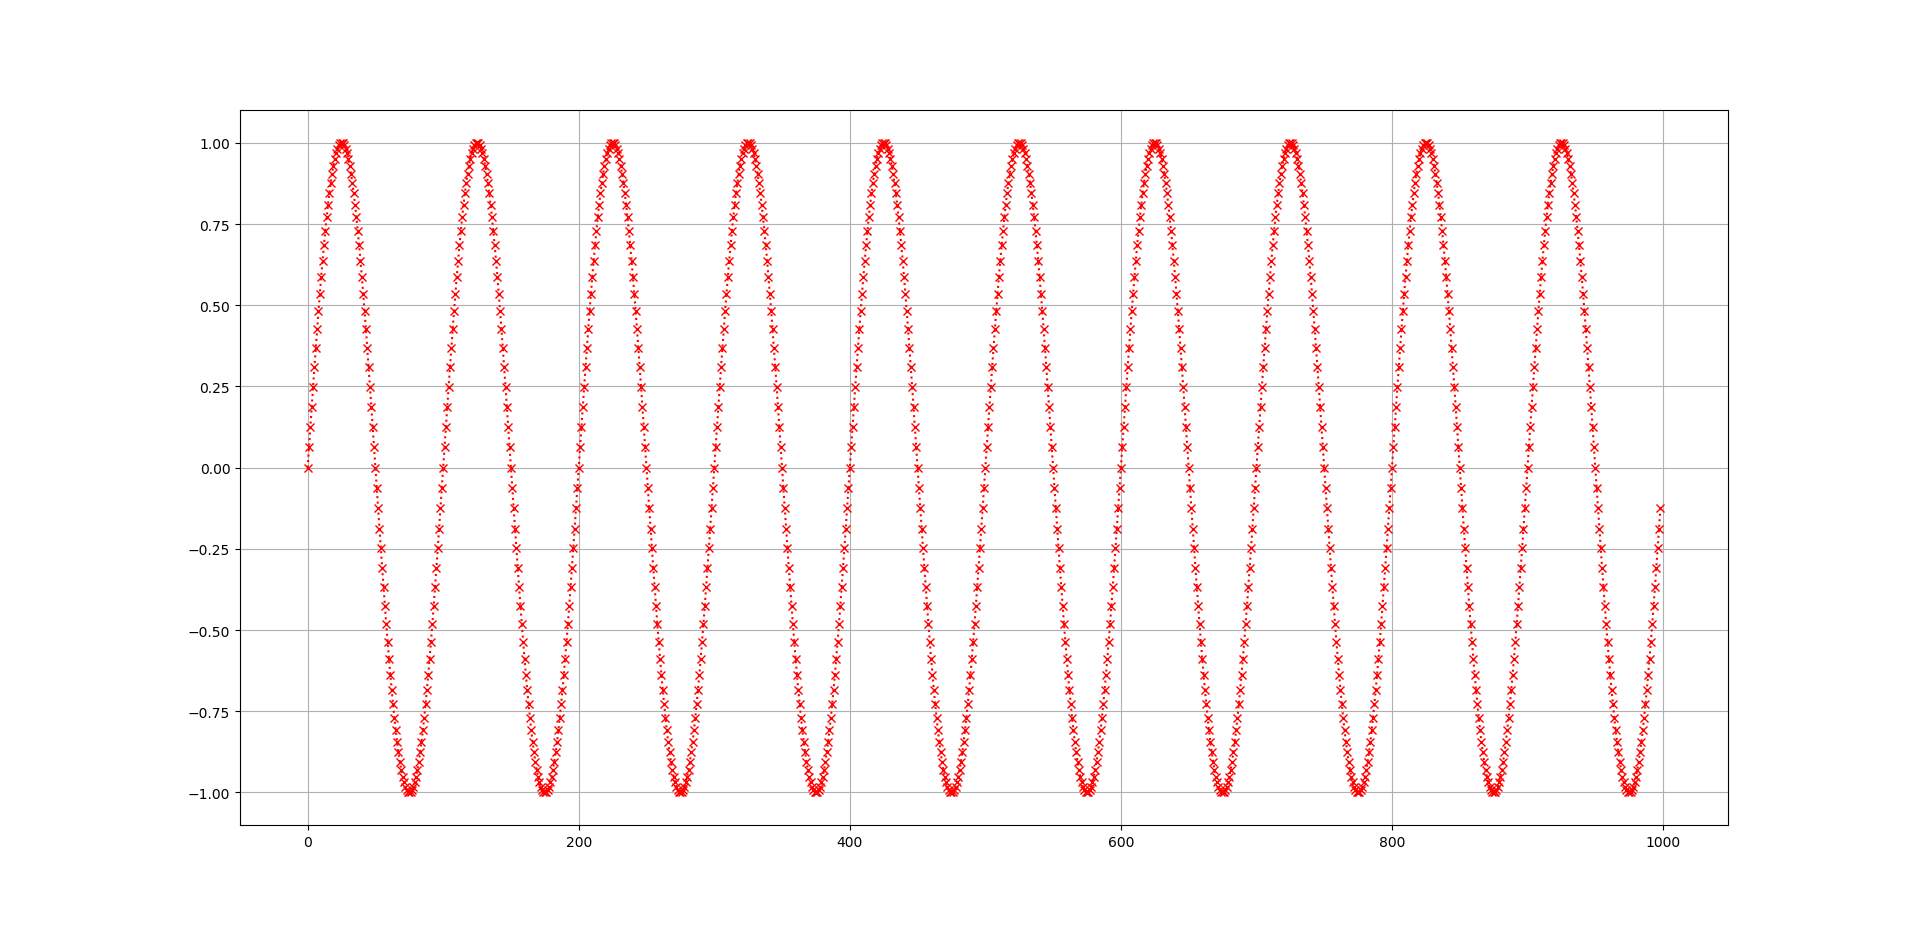

Senoidal 2 desfasada $\pi/2$
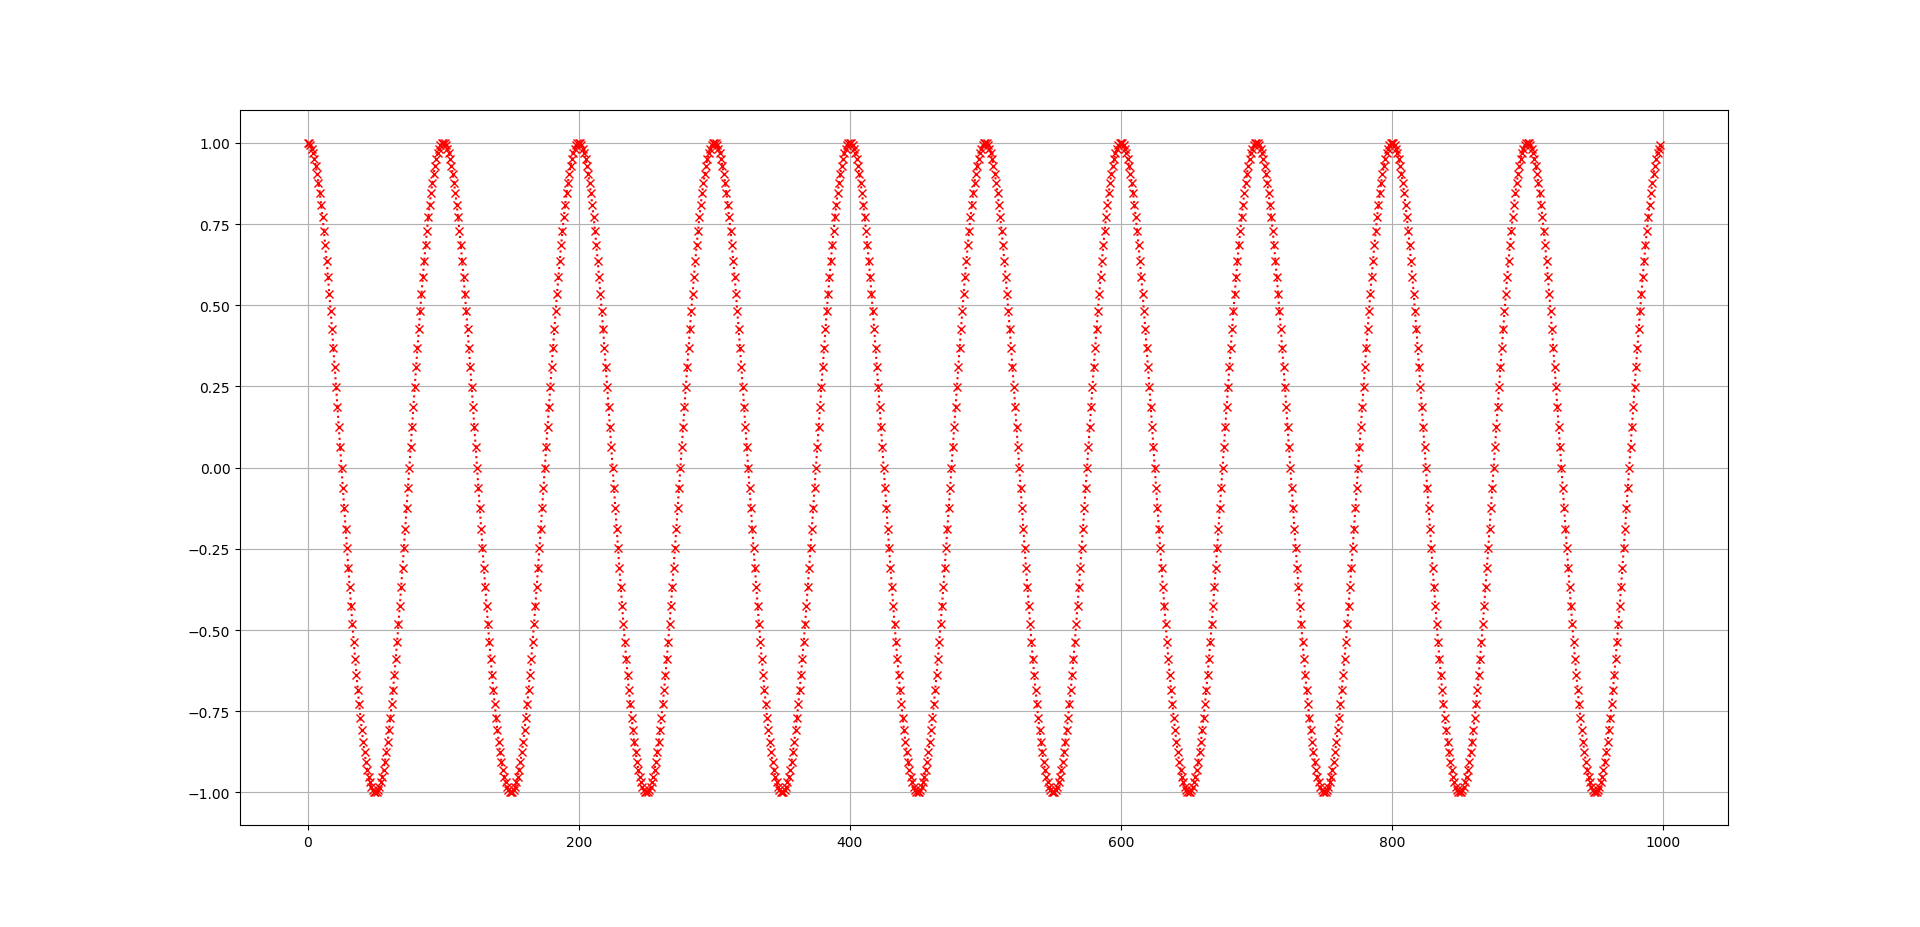

***
<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>


## Código:

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from pandas import DataFrame
from IPython.display import HTML


import math as m
import cmath as z


def generador_senoidal (f0,fs,N,a0=1,p0=0):
    signal=[]
    
    for k in range(0,N-1):
        signal.append (a0*m.sin(2*k*m.pi*(f0/fs) + p0))
        
    return signal


def sumatoria (s_transf,f0,fs,N):
    valor = 0
    muestra=0
    for k in range(0,N-1):
        if k != round(f0*N/fs):
            muestra = z.polar(s_transf[k])
            valor = valor + muestra[0]**2
        else: 
            valor=valor
     
    return valor

# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz

fD_1 = 0.01
fD_2 = 0.25
fD_3 = 0.5

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/4
f0_1 = fs/4 + fD_1   # Hz
f0_2 = fs/4 + fD_2   # Hz
f0_3 = fs/4 + fD_3   # Hz

sg0=generador_senoidal(f0,fs,N,a0,p0)
sg1=generador_senoidal(f0_1,fs,N,a0,p0)
sg2=generador_senoidal(f0_2,fs,N,a0,p0)
sg3=generador_senoidal(f0_3,fs,N,a0,p0)

sg_f0 = np.fft.fft(sg0)
sg_f1 = np.fft.fft(sg1)
sg_f2 = np.fft.fft(sg2)
sg_f3 = np.fft.fft(sg3)

#######################################
# Tu simulación que genere resultados #
#######################################


mag_sg_f0 = z.polar(sg_f0[round((f0*N)/fs)])#magnitud(sg_f0[round(f0*N/fs)])
mag_sg_f1 = z.polar(sg_f1[round((f0_1*N)/fs)])#magnitud(sg_f1[round(f0_1*N/fs)])
mag_sg_f2 = z.polar(sg_f2[round((f0_2*N)/fs)])#magnitud(sg_f2[round(f0_2*N/fs)])
mag_sg_f3 = z.polar(sg_f3[round((f0_3*N)/fs)])#magnitud(sg_f3[round(f0_3*N/fs)])


mag_sg_f0_ad = z.polar(sg_f0[round(f0*N/fs) + 1])
mag_sg_f1_ad = z.polar(sg_f1[round(f0_1*N/fs) + 1])
mag_sg_f2_ad = z.polar(sg_f2[round(f0_2*N/fs) + 1])
mag_sg_f3_ad = z.polar(sg_f3[round(f0_3*N/fs) + 1])

sum_f0 = sumatoria(sg_f0,f0,fs,N)
sum_f1 = sumatoria(sg_f1,f0_1,fs,N)
sum_f2 = sumatoria(sg_f2,f0_2,fs,N)
sum_f3 = sumatoria(sg_f3,f0_3,fs,N)

tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   ['',                        '',                           '$F:f \neq f_0$'], 
                  [mag_sg_f0[0], mag_sg_f0_ad[0], sum_f0], # <-- acá debería haber numeritos :)
                  [mag_sg_f1[0], mag_sg_f1_ad[0], sum_f1], # <-- acá debería haber numeritos :)
                  [mag_sg_f2[0], mag_sg_f2_ad[0], sum_f2], # <-- acá debería haber numeritos :)
                  [mag_sg_f3[0], mag_sg_f3_ad[0], sum_f3]  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())

,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,449.354,89.5883,296582
$f_S/4+0.01$,453.155,87.4351,293153
$f_S/4+0.25$,499.5,0.124843,249500
$f_S/4+0.5$,449.548,149.92,296408


***
<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

### Código:

In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from pandas import DataFrame
from IPython.display import HTML


import math as m


def generador_senoidal (f0,fs,N,a0=1,p0=0):
    signal=[]
    
    for k in range(0,N-1):
        signal.append (a0*m.sin(2*k*m.pi*(f0/fs) + p0))
        
    return signal

def zero_padding (signal,M,N):
    signal=sg[:]
    for k in range(N,N + M):
        signal.append (0)
    return signal

# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/4 + 0.5 #Hz


sg=generador_senoidal(f0,fs,N,a0,p0)
sg_tf = np.fft.fft(sg)

sg_zp1 = zero_padding(sg,round(N/10),N)

sg=generador_senoidal(f0,fs,N,a0,p0)
sg_zp2 = zero_padding(sg,N,N)

sg=generador_senoidal(f0,fs,N,a0,p0)
sg_zp3 = zero_padding(sg,N*10,N)

transf_zp1 = np.fft.fft(sg_zp1)
transf_zp2 = np.fft.fft(sg_zp2)
transf_zp3 = np.fft.fft(sg_zp3)


## Variación espectral con zero padding

### Espectro sin agregación de ceros
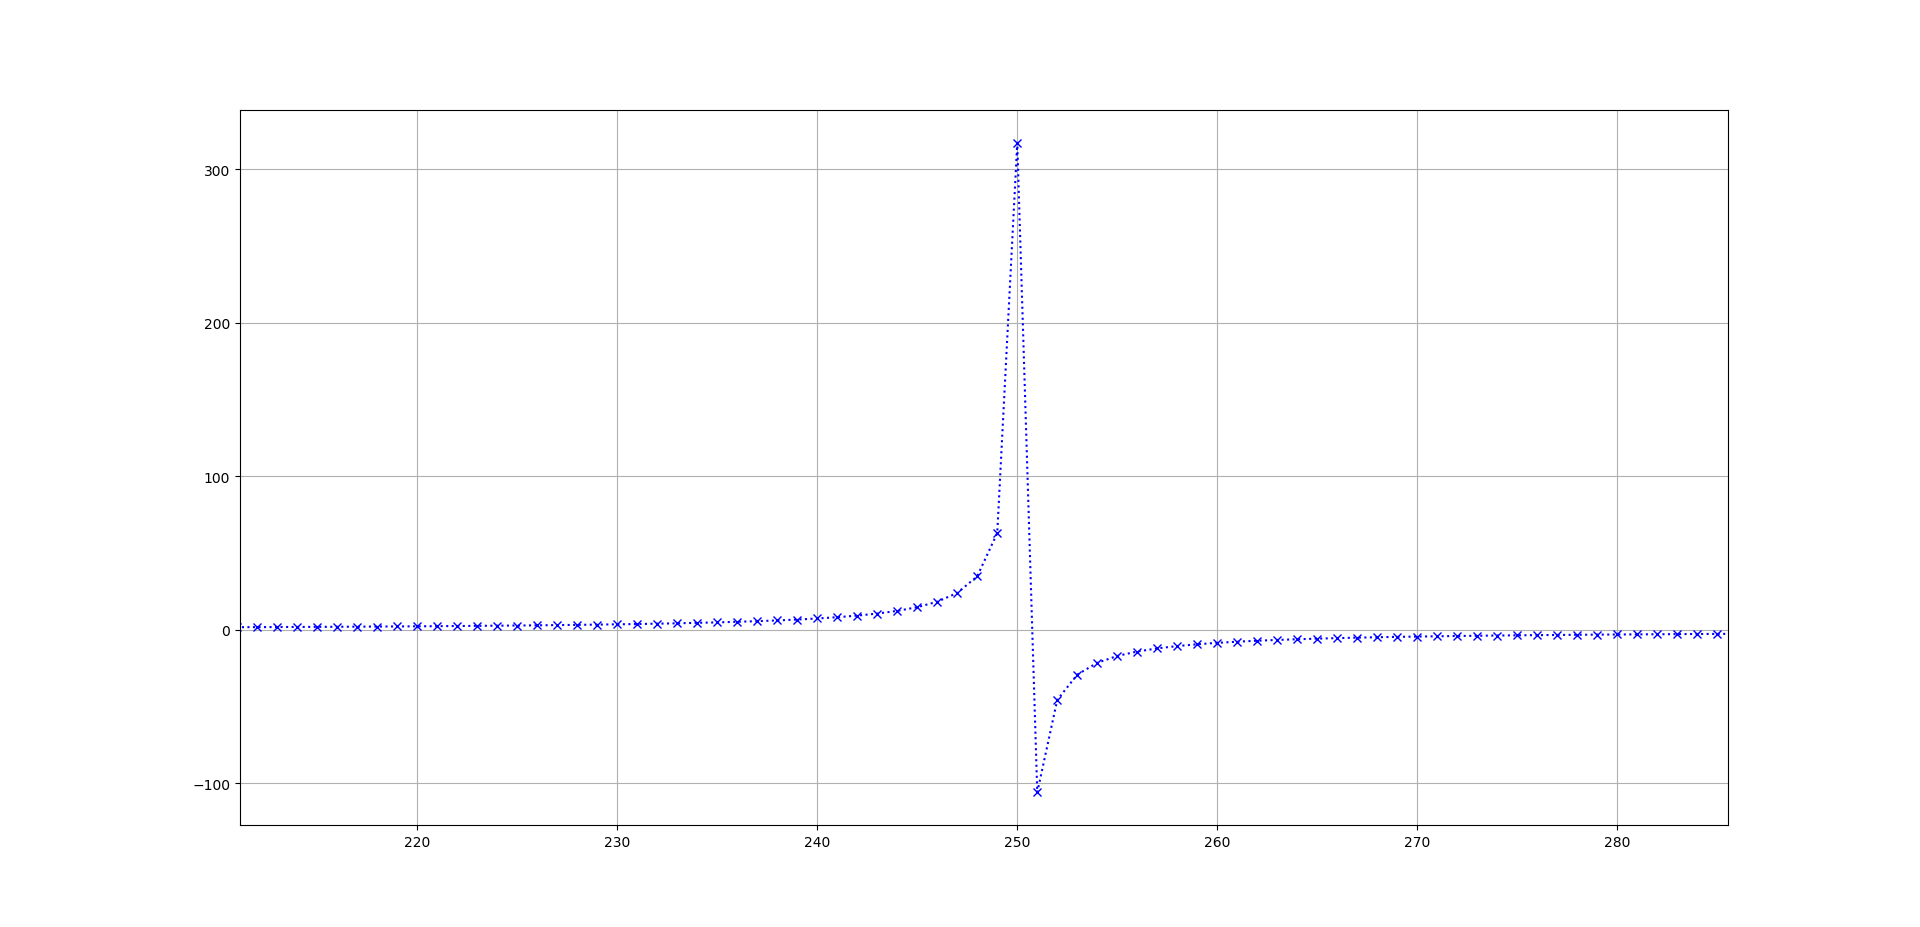

### M=N / 10
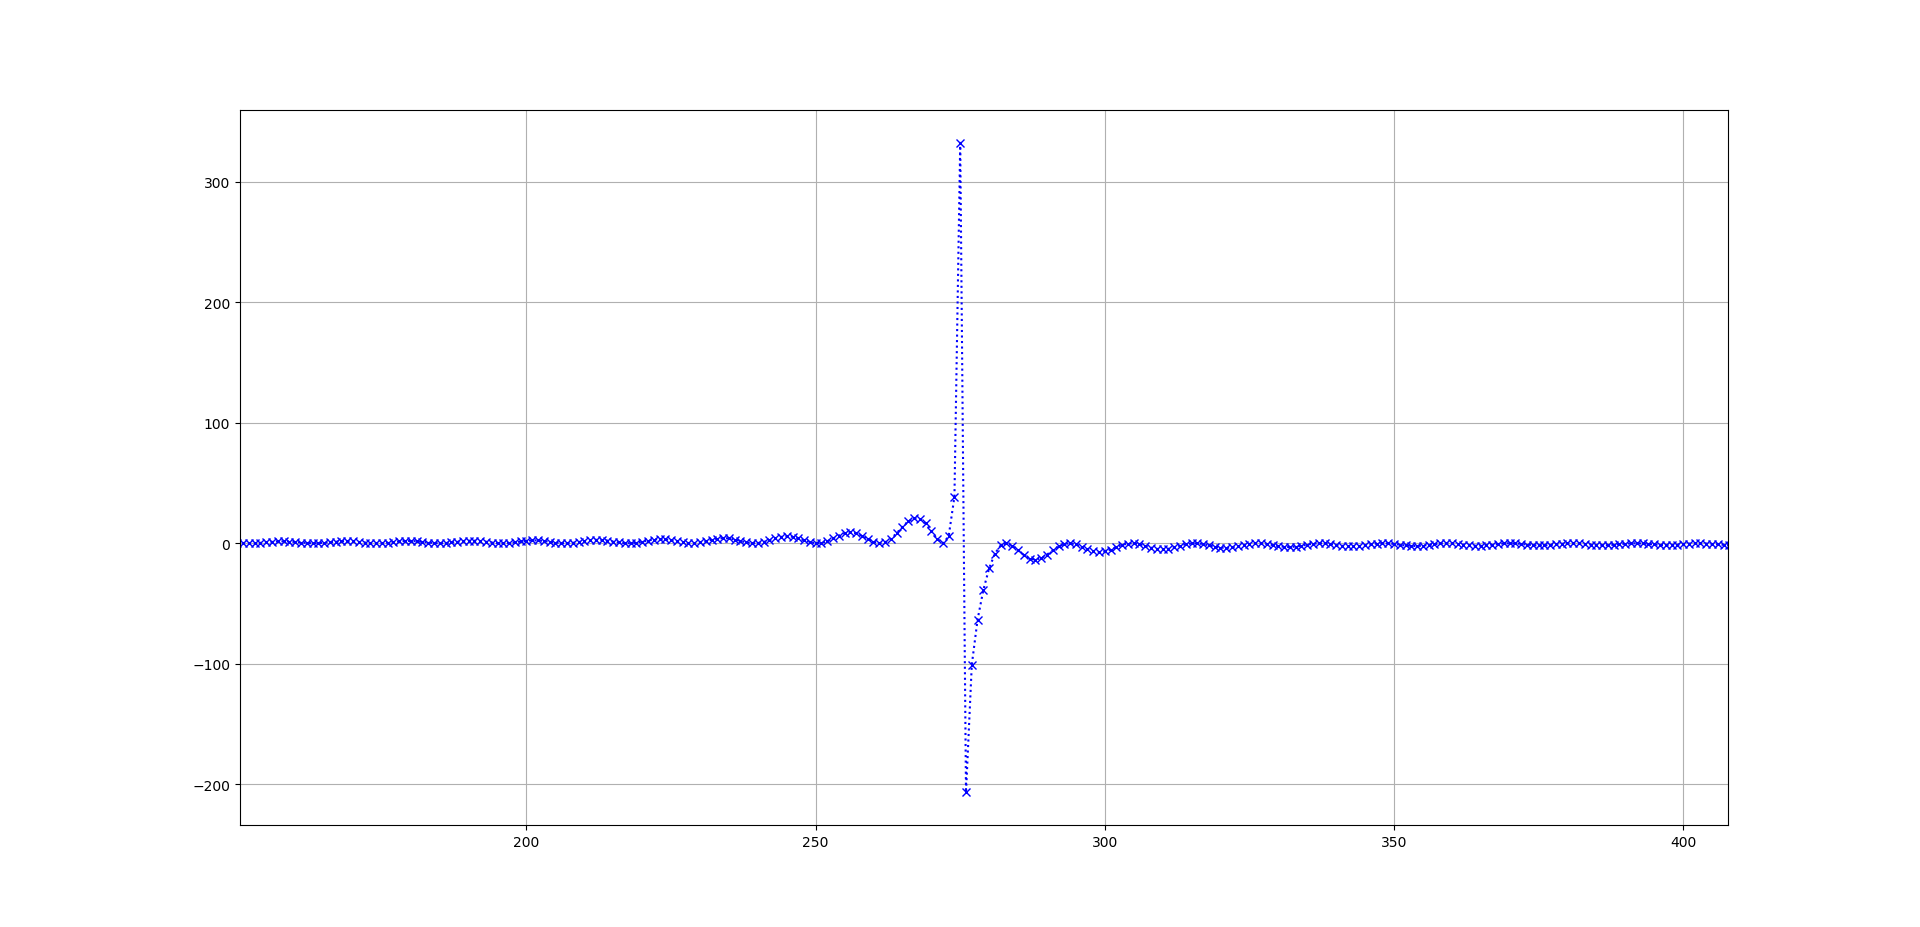

### M=N
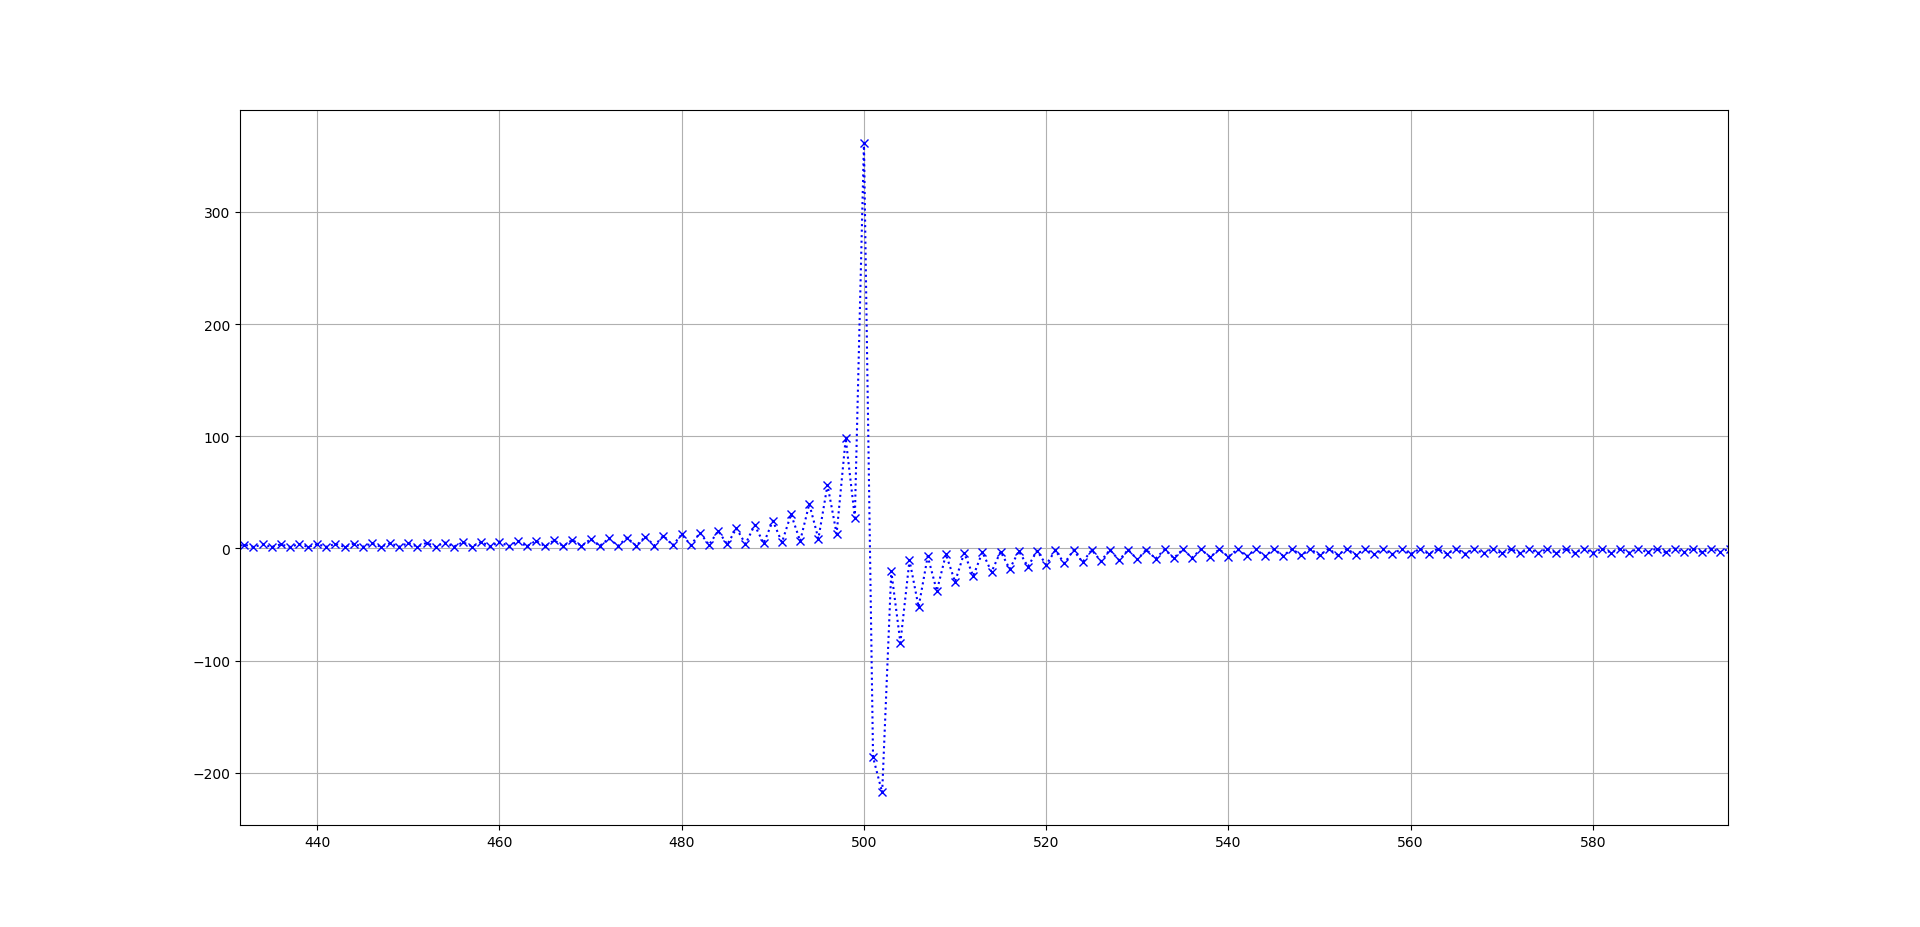

### M=N * 10
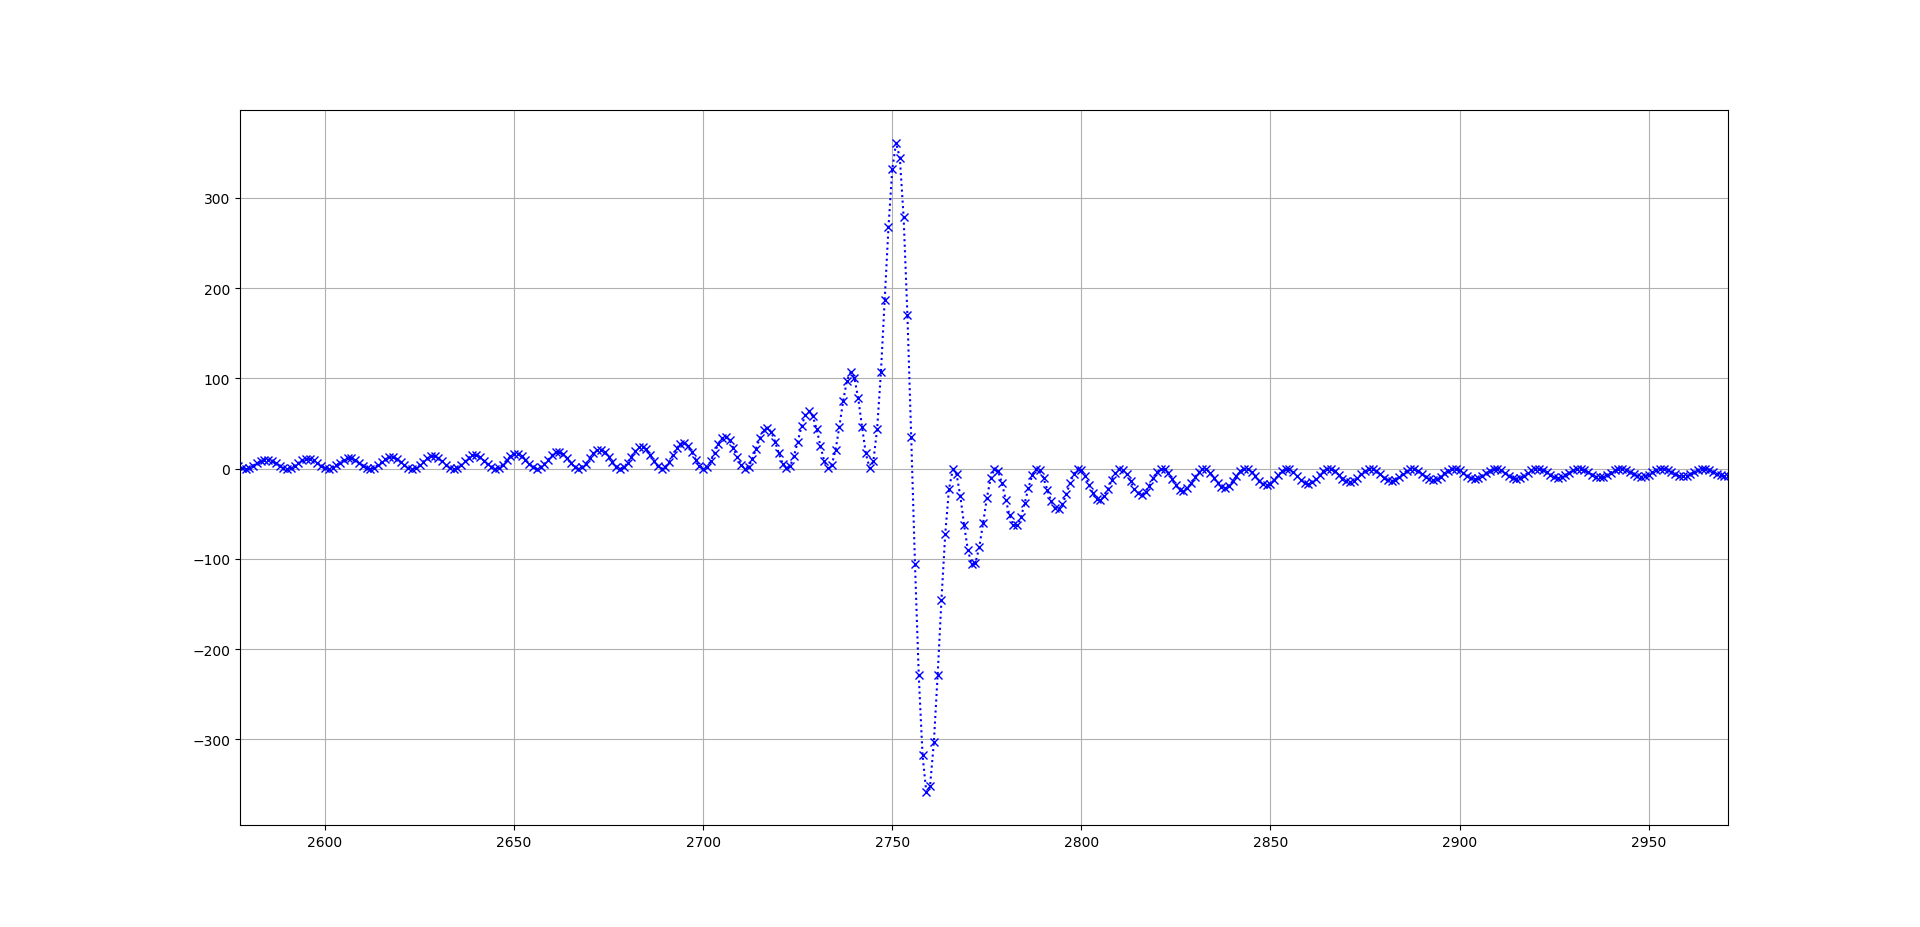

## Sobre la variación de los espectros con agregación de ceros

Los espectros en los que se le agregaron M ceros, tienen una resolución más definida. Esto es porque al agregar más ceros hacemos un oversampling sobre la señal de entrada por lo que es benigno. Sin embargo al agregar una cantidad excesiva de ceros, se utilizará una DFT de N+M puntos, lo cual, en algún caso, puede ser innecesario. Como ejemplo una **M=10*N** muestra una resolución muy apreciable, pero innecesaria.

***
## Máximo del espectro y diferencia con f0

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from pandas import DataFrame
from IPython.display import HTML


import math as m
import cmath as z


def generador_senoidal (f0,fs,N,a0=1,p0=0):
    signal=[]
    
    for k in range(0,N-1):
        signal.append (a0*m.sin(2*k*m.pi*(f0/fs) + p0))
        
    return signal

def maximo (signal,M):
    
    k_mayor=0
    for k in range(1,M-1):
        signal_mod_prev=z.polar(signal[k-1])
        signal_mod=z.polar(signal[k])
        if signal_mod[1]>signal_mod_prev[1]:
            k_mayor=k
        else:
            k_mayor=k_mayor
    
    return k_mayor

def zero_padding (signal,M,N):
    signal=sg[:]
    for k in range(N,N + M):
        signal.append (0)
    return signal

# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs + 10#Hz


sg=generador_senoidal(f0,fs,N,a0,p0)


sg_zp1 = zero_padding(sg,round(N/10),N)
sg_zp2 = zero_padding(sg,N,N)
sg_zp3 = zero_padding(sg,N*10,N)

transf_sg = np.fft.fft(sg)
transf_zp1 = np.fft.fft(sg_zp1)
transf_zp2 = np.fft.fft(sg_zp2)
transf_zp3 = np.fft.fft(sg_zp3)

m_max0 = maximo(transf_sg,N)
m_max1 = maximo(transf_zp1,N+round(N/10))
m_max2 = maximo(transf_zp2,2*N)
m_max3 = maximo(transf_zp3,N+N*10)

f0_max_0 = (m_max0*fs)/N
f0_max_1 = (m_max1*fs)/N
f0_max_2 = (m_max2*fs)/N
f0_max_3 = (m_max3*fs)/N


error0=((f0-f0_max_0)/f0)*100
error1=((f0_max_1-f0)/f0)*100
error2=((f0_max_2-f0)/f0)*100
error3=((f0_max_3-f0)/f0)*100


tus_resultados = [error0, # <-- acá debería haber numeritos :)
                  error1, # <-- acá debería haber numeritos :)
                  error2, # <-- acá debería haber numeritos :)
                  error3 # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$e_\%$'],
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())

,$e_\%$
0,1.188119
$N/10$,8.712871
$N$,97.821782
$10N$,988.019802
